### Plantilla espacial

---

Esta plantilla es utilizada por el notebook `PAPERMILL_espacial.ipynb`.

Recibe un cuadrante para extraer datos de TSM, así como el nombre de la región para generar los informes en formato  `pdf`.

El número de informes depende de las coberturas (cuadrantes) y nombres de regiones especificadas en el notebook antes mencionado.

### Parametros

---

Cobertura de la región `[lon_min, lon_max, lat_min, lat_max]`, nombre de la región y mombre de la plantilla.

Importar librería

---

In [ ]:
import subprocess

In [ ]:
region = [-100, -85, 18, 32] #'Golfo de Mexico' 
regionName = 'Golfo de Mexico'
nombre_salida = "TEMPLATE_espacial"


In [ ]:
regionNameTitle = regionName.replace('_', ' ')
print('Nombre de la región: ', regionNameTitle)
print('Cobertura: ', region)

Zona:  Golfo de Mexico
Dominio:  [-100.0, -85.0, 18.0, 32.0]


In [ ]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

import matplotlib
import matplotlib.gridspec as gridspec
import numpy as np
import glob
from collections import Counter
from netCDF4 import Dataset
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmocean

### Datos de entrada (TSM)

---

In [ ]:
fn = '../data/20251004120000-REMSS-L4_GHRSST-SSTfnd-MW_IR_OI-GLOB-v02.0-fv05.1.nc'
ds = xr.open_dataset(fn) 
sst = ds.analysed_sst
sst = sst - 273.15 # convertiendo a Celsius de Kelvin

### Cobertura de los datos de entrada

---

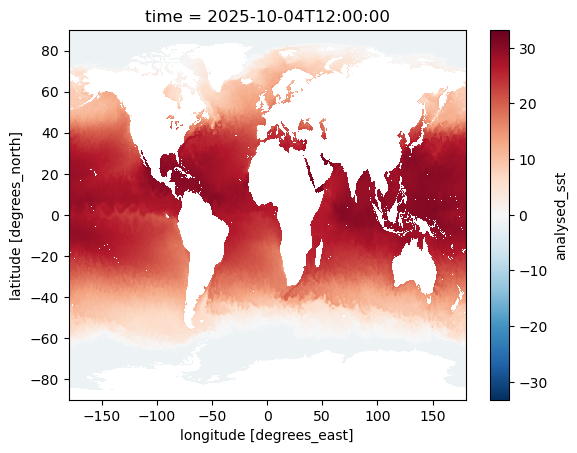

In [ ]:
sst.plot();

### Región seleccionada

---

In [ ]:
sst_sel = sst.sel(lat=slice(region[2],region[3]), lon=slice(region[0],region[1]))
sst_sel = sst_sel.squeeze()
sst_sel.plot();

### Mapa de TSM en la región de interés

---

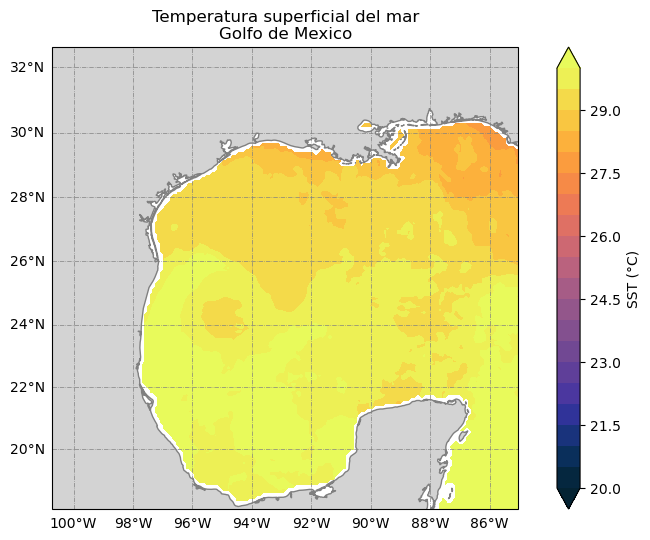

In [ ]:
fig = plt.figure(figsize=(10,6))
ax = plt.subplot(111, projection=ccrs.Miller())
#ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

ax.set_title(f"Temperatura superficial del mar\n{regionNameTitle}")

# Definir niveles para contourf
levels_contourf = np.linspace(20, 30, 21)  # 21 niveles y van de 0ªC a 20 ªC

# Contourf para colores
cf = ax.contourf(sst_sel.lon.values, sst_sel.lat.values, sst_sel, levels=levels_contourf, transform=ccrs.PlateCarree(),
                 cmap=cmocean.cm.thermal, extend='both')

# Contour para isotermas específicas
iso = ax.contour(sst_sel.lon.values, sst_sel.lat.values, sst_sel, levels=[15, 25], colors='lightgray', linewidths=1,
                 transform=ccrs.PlateCarree())
ax.clabel(iso, fmt='%d°C', inline=True, fontsize=10)  # etiquetas en las isotermas

# Tierra con cfeature.LAND
ax.add_feature(cfeature.LAND, facecolor='lightgray', edgecolor='grey')

# Gridlines
gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='grey', linestyle='-.')
gl.top_labels = False
gl.right_labels = False

# Barra de colores
cb = plt.colorbar(cf, extend="both", orientation='vertical')
cb.set_label("SST (°C)")

plt.show()

### Mapa de anomalías de TSM

---

In [ ]:
print('La media de TSM para el día ' + str(sst_sel.time.values)[0:10] + ' en la región de ' + regionNameTitle + ' fue:', sst_sel.mean().values, '˚C')
# print('La anomalía de SST en el día ' + str(sst_sel.time.values)[0:10] + ' para esta zona fue:')

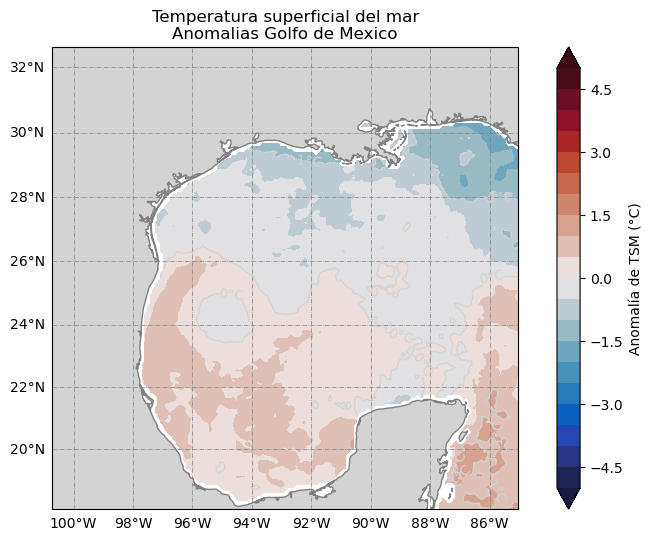

In [ ]:
anomaly = sst_sel - sst_sel.mean()

fig = plt.figure(figsize=(10,6))
ax = plt.subplot(111, projection=ccrs.Miller())
#ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

# Título
ax.set_title(f"Anomalías de temperatura superficial del mar\n{regionNameTitle}")

# Definir niveles para contourf
levels_contourf = np.linspace(-5, 5, 21)  # 21 niveles y van de 0ªC a 20 ªC

# Contourf para colores
cf = ax.contourf(anomaly.lon.values, anomaly.lat.values, anomaly, levels=levels_contourf, transform=ccrs.PlateCarree(), cmap=cmocean.cm.balance, extend='both')

# Contour para isotermas específicas
iso = ax.contour(anomaly.lon.values, anomaly.lat.values, anomaly, levels=[-2, -1, 0, 1, 2], colors='grey', linewidths=1, transform=ccrs.PlateCarree())

ax.clabel(iso, fmt='%d°C', inline=True, fontsize=10)  # etiquetas en las isotermas

# Tierra con cfeature.LAND
ax.add_feature(cfeature.LAND, facecolor='lightgray', edgecolor='grey')

# Gridlines
gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='grey', linestyle='-.')
gl.top_labels = False
gl.right_labels = False

# Barra de colores
cb = plt.colorbar(cf, extend="both", orientation='vertical')
cb.set_label("Anomalía de TSM (°C)")

plt.show()

### Conversión de el notebook a pdf

---

In [ ]:

# Construimos el comando nbconvert usando el parámetro: nombre_entrada
command = f'jupyter nbconvert --to pdf --no-input {nombre_salida}.ipynb --output {nombre_salida}.pdf'

# Ejecutamos el comando
subprocess.run(command, shell=True, check=True)

[NbConvertApp] Converting notebook TEMPLATE_espacial.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 4 image(s).
[NbConvertApp] Writing 749923 bytes to TEMPLATE_espacial.html


CompletedProcess(args='jupyter nbconvert --to html --no-input TEMPLATE_espacial.ipynb --output TEMPLATE_espacial.html', returncode=0)